# <a id=id2><center>Module 2- Data visualization and Technical Analysis</center></a>

## <a id=id3 style="color:#FF0000;">Data visualization and Technical Analysis</a>
'A picture speaks a thousand words' has never been truer in financial markets. Absolutely no one goes through the millions of rows of numbers, we always prefer the data in a plotted form to draw better inferences. This module would cover the plotting, basic technical indicators and our own customisation, and making our own trade calls!

# <a id=id2>PROBLEM STATEMENT 2.1</a>

Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.

- Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock
- This would be helpful if we are to train our model to take NLP inputs.

<img src="https://www.aspiration.link/machine-learning/internship/images/1.png" alt="Drawing" style="width: 400px;" align="left"/>

#### Load the week2.csv file into a dataframe.

In [1]:
import pandas as pd
raymond = pd.read_csv('./week2.csv', index_col=0)
raymond.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,VWAP,Day_Perc_Change,Trend
0,RAYMOND,EQ,2017-05-15,763.45,765.00,779.00,757.05,773.9,772.80,770.09,292498,2.252491e+08,9033,55467,18.96,2017,5,772.800000,0.000000,Slight or No change
1,RAYMOND,EQ,2017-05-16,772.80,773.45,801.45,768.10,783.5,785.00,788.89,823956,6.500070e+08,18238,179377,21.77,2017,5,781.803741,1.578675,Positive
2,RAYMOND,EQ,2017-05-17,785.00,786.00,804.95,778.40,785.5,783.65,792.72,598094,4.741212e+08,13968,127637,21.34,2017,5,782.447781,-0.171975,Slight or No change
3,RAYMOND,EQ,2017-05-18,783.65,779.35,779.95,740.20,744.0,746.95,762.57,319834,2.438956e+08,7713,92200,28.83,2017,5,776.867021,-4.683213,Among top losers
4,RAYMOND,EQ,2017-05-19,746.95,748.00,767.50,714.00,722.0,723.10,740.30,561346,4.155619e+08,13328,137648,24.52,2017,5,765.239492,-3.192985,Among top losers


####  Type of `Date` columns

In [2]:
raymond.Date.dtype

dtype('O')

**`Date` Columns is type `Object`**<br>
Let's convert Date column in `datatime64[ns]` type

In [3]:
raymond.Date = pd.to_datetime(raymond.Date)

In [4]:
raymond.Date.dtype

dtype('<M8[ns]')

In [5]:
pd.np.dtype('<M8[ns]') == pd.np.dtype('datetime64[ns]')

C:\Users\Shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


True

####  Convert the Date column to the index of the dataframe

In [6]:
raymond = raymond.set_index('Date')
raymond.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,RAYMOND,EQ,763.45,765.00,779.00,757.05,773.9,772.80,770.09,292498,2.252491e+08,9033,55467,18.96,2017,5,772.800000,0.000000,Slight or No change
2017-05-16,RAYMOND,EQ,772.80,773.45,801.45,768.10,783.5,785.00,788.89,823956,6.500070e+08,18238,179377,21.77,2017,5,781.803741,1.578675,Positive
2017-05-17,RAYMOND,EQ,785.00,786.00,804.95,778.40,785.5,783.65,792.72,598094,4.741212e+08,13968,127637,21.34,2017,5,782.447781,-0.171975,Slight or No change
2017-05-18,RAYMOND,EQ,783.65,779.35,779.95,740.20,744.0,746.95,762.57,319834,2.438956e+08,7713,92200,28.83,2017,5,776.867021,-4.683213,Among top losers
2017-05-19,RAYMOND,EQ,746.95,748.00,767.50,714.00,722.0,723.10,740.30,561346,4.155619e+08,13328,137648,24.52,2017,5,765.239492,-3.192985,Among top losers


####  Plot the closing price of each of the days

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

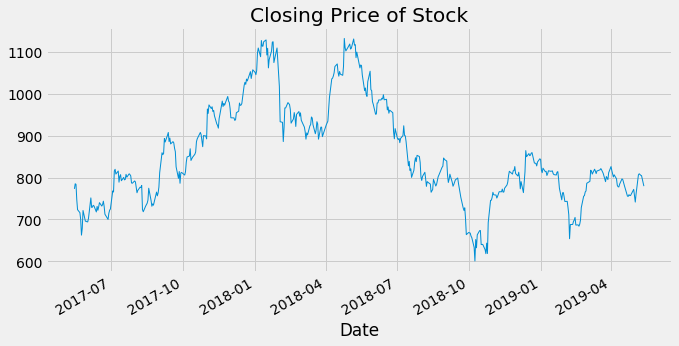

In [8]:
plt.style.use('fivethirtyeight')
raymond.plot(y="Close Price", title="Closing Price of Stock", grid=True, legend=False, linewidth=1, figsize=(10,5))
plt.show()

Let we see the what are the drastic changes in the stock

In [9]:
drastic_change_df = raymond[(raymond.Month==2) & (raymond.Year==2018)].head(5)
drastic_change_df.style.apply(lambda x:['background: #d65f5f' if x.name=="Close Price" else '' for i in x])

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2018-02-01 00:00:00,RAYMOND,EQ,1049.700000,1045.250000,1062.100000,945.100000,1017.600000,1017.700000,1012.490000,1030146,1043010784.500000,25534,173324,16.830000,2018,2,867.821008,-3.048490,Among top losers
2018-02-02 00:00:00,RAYMOND,EQ,1017.700000,1009.000000,1009.000000,921.000000,927.000000,933.300000,960.210000,1054416,1012462886.150000,28104,265833,25.210000,2018,2,868.371027,-8.293210,Bear drop
2018-02-05 00:00:00,RAYMOND,EQ,933.300000,922.250000,946.950000,867.000000,941.550000,931.900000,916.900000,757335,694403869.900000,15632,151685,20.030000,2018,2,868.752014,-0.150005,Slight or No change
2018-02-06 00:00:00,RAYMOND,EQ,931.900000,861.000000,910.000000,851.000000,890.950000,885.900000,883.700000,1092806,965716233.200000,35544,289417,26.480000,2018,2,868.899132,-4.936152,Among top losers
2018-02-07 00:00:00,RAYMOND,EQ,885.900000,914.000000,930.700000,894.000000,915.950000,919.150000,917.790000,977045,896726571.250000,20153,195710,20.030000,2018,2,869.281648,3.753245,Among top gainers


We need to know the exact date when the drastic changes were happen in the stock

In [10]:
df= raymond['Close Price'].diff().abs().sort_values(ascending = False).head(50)

So,we are finding the dates

In [11]:
df

Date
2018-02-02    84.40
2018-10-26    73.90
2017-11-01    71.50
2018-04-25    66.90
2017-08-10    57.85
2018-07-16    57.65
2019-02-07    57.40
2018-10-29    53.15
2018-10-10    51.25
2018-12-13    50.75
2017-07-05    50.40
2018-01-25    49.60
2017-06-05    48.60
2017-09-04    47.60
2018-02-08    47.10
2018-01-18    46.90
2018-02-06    46.00
2019-05-06    45.75
2018-06-27    45.40
2018-04-09    44.95
2018-05-29    44.00
2017-12-18    43.50
2017-07-03    43.35
2017-05-26    42.85
2018-01-04    41.40
2018-01-09    38.75
2018-09-28    38.25
2018-05-21    37.60
2017-05-24    37.30
2017-05-18    36.70
2017-09-22    36.50
2018-03-23    36.35
2018-01-16    36.05
2017-09-07    35.65
2018-05-25    35.00
2018-01-29    34.80
2018-08-01    34.55
2017-09-01    34.45
2019-02-08    33.85
2018-10-17    33.60
2018-09-04    33.50
2018-02-07    33.25
2018-02-16    32.70
2018-10-09    32.45
2018-02-01    32.00
2017-11-20    31.85
2017-08-28    31.40
2018-05-10    31.15
2018-10-12    30.90
2018-01-30    3

So,Here We are taking dates with High Drastic Changes in the stock close prices

Which dates having the `>50` changes between the stock on day to day,Those we are Considering for news extraction <br>
Now we are looking for the exact dates where the changes happen

In [12]:
drastic_change_df = raymond[(raymond.Month==10) & (raymond.Year==2018)].tail(5)
drastic_change_df.style.apply(lambda x:['background: #d65f5f' if x.name=="Close Price" else '' for i in x])

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2018-10-25 00:00:00,RAYMOND,EQ,643.100000,639.500000,640.000000,614.750000,619.500000,618.300000,627.710000,490539,307914053.850000,11527,72589,14.800000,2018,10,881.119280,-3.856321,Among top losers
2018-10-26 00:00:00,RAYMOND,EQ,618.300000,631.000000,702.500000,621.500000,686.200000,692.200000,676.210000,4176782,2824388471.150000,91790,768430,18.400000,2018,10,877.822887,11.952127,Bull run
2018-10-29 00:00:00,RAYMOND,EQ,692.200000,693.000000,765.000000,688.250000,744.000000,745.350000,743.740000,2870208,2134680443.650000,59643,390981,13.620000,2018,10,876.253301,7.678417,Bull run
2018-10-30 00:00:00,RAYMOND,EQ,745.350000,745.000000,764.800000,723.000000,749.500000,745.650000,742.600000,1353845,1005371683.050000,30672,70966,5.240000,2018,10,875.527451,0.040250,Slight or No change
2018-10-31 00:00:00,RAYMOND,EQ,745.650000,748.800000,760.500000,733.450000,752.500000,752.550000,749.220000,726847,544571331.500000,18154,66976,9.210000,2018,10,875.161604,0.925367,Slight positive


In [13]:
drastic_change_df = raymond[(raymond.Month==10) & (raymond.Year==2017)].tail(5)
drastic_change_df.style.apply(lambda x:['background: #d65f5f' if x.name=="Close Price" else '' for i in x])

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2017-10-25 00:00:00,RAYMOND,EQ,902.150000,922.000000,924.900000,879.800000,883.850000,887.050000,894.020000,927758,829431396.350000,15909,208050,22.430000,2017,10,797.180989,-1.673779,Negative
2017-10-26 00:00:00,RAYMOND,EQ,887.050000,887.050000,890.000000,864.400000,876.950000,873.650000,876.230000,444131,389161932.500000,7710,162706,36.630000,2017,10,797.594670,-1.510625,Negative
2017-10-27 00:00:00,RAYMOND,EQ,873.650000,879.000000,910.000000,876.500000,905.000000,900.200000,894.740000,673736,602821762.450000,14983,114963,17.060000,2017,10,798.429848,3.038974,Among top gainers
2017-10-30 00:00:00,RAYMOND,EQ,900.200000,906.000000,911.550000,893.700000,897.000000,899.250000,901.470000,407950,367753030.400000,9920,51395,12.600000,2017,10,798.924316,-0.105532,Slight or No change
2017-10-31 00:00:00,RAYMOND,EQ,899.250000,904.000000,904.000000,888.000000,892.150000,892.300000,894.150000,262263,234502755.450000,6266,80928,30.860000,2017,10,799.217802,-0.772866,Slight negative


In [14]:
drastic_change_df = raymond[(raymond.Month==11) & (raymond.Year==2017)].head(5)
drastic_change_df.style.apply(lambda x:['background: #d65f5f' if x.name=="Close Price" else '' for i in x])

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2017-11-01 00:00:00,RAYMOND,EQ,892.300000,892.750000,973.350000,892.750000,962.000000,963.800000,941.770000,2349572,2212757798.900000,43924,315126,13.410000,2017,11,803.725228,8.013000,Bull run
2017-11-02 00:00:00,RAYMOND,EQ,963.800000,958.200000,974.400000,941.850000,953.000000,953.300000,961.130000,1010126,970863054.700000,21092,200461,19.850000,2017,11,805.465861,-1.089438,Negative
2017-11-03 00:00:00,RAYMOND,EQ,953.300000,955.050000,983.000000,953.350000,970.850000,973.550000,971.110000,955851,928237176.850000,19135,138391,14.480000,2017,11,807.296632,2.124200,Positive
2017-11-06 00:00:00,RAYMOND,EQ,973.550000,970.000000,976.900000,955.400000,963.350000,964.800000,964.740000,576243,555923940.050000,10628,139982,24.290000,2017,11,808.324104,-0.898773,Slight negative
2017-11-07 00:00:00,RAYMOND,EQ,964.800000,961.050000,1004.600000,950.400000,967.000000,969.150000,982.510000,1830472,1798448383.000000,32256,248087,13.550000,2017,11,811.589126,0.450871,Slight or No change


In [15]:
drastic_change_df = raymond[(raymond.Month==4) & (raymond.Year==2018)].tail(5)
drastic_change_df.style.apply(lambda x:['background: #d65f5f' if x.name=="Close Price" else '' for i in x])

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2018-04-24 00:00:00,RAYMOND,EQ,1044.250000,1047.800000,1074.900000,1044.700000,1066.950000,1065.500000,1064.520000,1164986,1240155617.800000,24561,174849,15.010000,2018,4,886.402948,2.034953,Positive
2018-04-25 00:00:00,RAYMOND,EQ,1065.500000,1105.000000,1151.950000,1083.000000,1129.200000,1132.400000,1123.020000,4341885,4876011052.300000,102465,520601,11.990000,2018,4,893.109725,6.278742,Among top gainers
2018-04-26 00:00:00,RAYMOND,EQ,1132.400000,1140.500000,1142.100000,1100.050000,1114.000000,1110.750000,1113.460000,1050268,1169436358.950000,23703,214343,20.410000,2018,4,894.535629,-1.911869,Negative
2018-04-27 00:00:00,RAYMOND,EQ,1110.750000,1119.950000,1133.000000,1091.000000,1107.000000,1102.500000,1113.850000,695221,774373044.100000,15809,156762,22.550000,2018,4,895.433644,-0.742741,Slight negative
2018-04-30 00:00:00,RAYMOND,EQ,1102.500000,1110.000000,1131.800000,1105.850000,1116.000000,1112.050000,1120.590000,604464,677354855.200000,13402,61833,10.230000,2018,4,896.243869,0.866213,Slight positive


In [16]:
drastic_change_df = raymond[(raymond.Month==2) & (raymond.Year==2019)].head(8)
drastic_change_df.style.apply(lambda x:['background: #d65f5f' if x.name=="Close Price" else '' for i in x])

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2019-02-01 00:00:00,RAYMOND,EQ,754.350000,756.200000,764.950000,738.450000,742.000000,742.650000,752.490000,374709,281963981.550000,9698,64979,17.340000,2019,2,864.691768,-1.551004,Negative
2019-02-04 00:00:00,RAYMOND,EQ,742.650000,742.000000,752.900000,732.350000,742.000000,743.050000,741.900000,456333,338555363.600000,13423,57754,12.660000,2019,2,864.499422,0.053861,Slight or No change
2019-02-05 00:00:00,RAYMOND,EQ,743.050000,743.000000,746.000000,719.550000,726.750000,728.500000,734.210000,357403,262409087.500000,11139,52509,14.690000,2019,2,864.331203,-1.958145,Negative
2019-02-06 00:00:00,RAYMOND,EQ,728.500000,728.000000,732.800000,697.600000,712.000000,711.100000,710.970000,510679,363075415.750000,13834,81658,15.990000,2019,2,864.060864,-2.388469,Negative
2019-02-07 00:00:00,RAYMOND,EQ,711.100000,715.100000,722.950000,627.700000,656.000000,653.700000,666.870000,3927614,2619193578.400000,82774,704944,17.950000,2019,2,861.244726,-8.072001,Bear drop
2019-02-08 00:00:00,RAYMOND,EQ,653.700000,660.950000,709.900000,660.000000,686.250000,687.550000,691.320000,4933002,3410296053.300000,104582,499768,10.130000,2019,2,858.372513,5.178216,Among top gainers
2019-02-11 00:00:00,RAYMOND,EQ,687.550000,689.250000,695.900000,668.650000,690.000000,687.750000,683.380000,913837,624500974.400000,22090,65002,7.110000,2019,2,857.851444,0.029089,Slight or No change
2019-02-12 00:00:00,RAYMOND,EQ,687.750000,687.000000,699.000000,680.000000,695.050000,695.100000,689.650000,614403,423720388.400000,18131,64949,10.570000,2019,2,857.517958,1.068702,Positive


In [17]:
drastic_change_df = raymond[(raymond.Month==10) & (raymond.Year==2018)].head(9)
drastic_change_df.style.apply(lambda x:['background: #d65f5f' if x.name=="Close Price" else '' for i in x])

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2018-10-01 00:00:00,RAYMOND,EQ,663.400000,658.000000,672.000000,630.450000,672.000000,668.600000,653.410000,630186,411769441.750000,16729,74811,11.870000,2018,10,890.751551,0.783841,Slight positive
2018-10-03 00:00:00,RAYMOND,EQ,668.600000,676.000000,689.100000,662.500000,664.850000,667.100000,678.440000,688085,466822119.950000,15728,119304,17.340000,2018,10,890.073001,-0.224349,Slight or No change
2018-10-04 00:00:00,RAYMOND,EQ,667.100000,652.000000,677.800000,646.650000,654.900000,660.000000,664.190000,481212,319615112.250000,14781,168727,35.060000,2018,10,889.585866,-1.064308,Negative
2018-10-05 00:00:00,RAYMOND,EQ,660.000000,650.100000,671.900000,633.900000,636.150000,656.350000,660.670000,460723,304385967.700000,17077,105893,22.980000,2018,10,889.114017,-0.553030,Slight negative
2018-10-08 00:00:00,RAYMOND,EQ,656.350000,642.000000,647.950000,618.100000,631.400000,632.900000,634.230000,588247,373082475.100000,14277,77610,13.190000,2018,10,888.453917,-3.572789,Among top losers
2018-10-09 00:00:00,RAYMOND,EQ,632.900000,635.000000,643.900000,593.000000,598.000000,600.450000,610.960000,837123,511451133.350000,18052,201585,24.080000,2018,10,887.401844,-5.127192,Among top losers
2018-10-10 00:00:00,RAYMOND,EQ,600.450000,606.000000,656.750000,604.300000,650.500000,651.700000,635.430000,617188,392178141.050000,16996,122108,19.780000,2018,10,886.768747,8.535265,Bull run
2018-10-11 00:00:00,RAYMOND,EQ,651.700000,630.000000,647.950000,614.850000,632.000000,632.000000,633.280000,392480,248549988.400000,9689,43364,11.050000,2018,10,886.334324,-3.022863,Among top losers
2018-10-12 00:00:00,RAYMOND,EQ,632.000000,638.000000,669.450000,638.000000,659.000000,662.900000,658.910000,442420,291515826.900000,10984,42065,9.510000,2018,10,885.905678,4.889241,Among top gainers


Now we are Extracting news from different resources
<table align:left>
    <tr>
        <th>Date</th>
    </tr>
    <tr>
        <td>2018-02-02</td>
    </tr>
    <tr>
        <td>2018-10-26</td>
    </tr><tr>
        <td>2017-11-01</td>
    </tr><tr>
        <td>2018-04-25</td>
    </tr><tr>
        <td>2017-08-10</td>
    </tr><tr>
        <td>2018-07-16</td>
    </tr><tr>
        <td>2019-02-07</td>
    </tr><tr>
        <td>2018-10-29</td>
    </tr><tr>
        <td>2018-10-10</td>
    </tr>

In [20]:
import bs4
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests

In [21]:
url_2018_02_02 = 'https://www.outlookindia.com/sharemarket/raymond-ltd-raymond-500330/2018-02-02'
r = requests.get(url_2018_02_02) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'stock_trail_left')
stock_news_subhead_container = soup.find('div',class_ = 'company_div')
print("Obtaining news")
print("News for 2018-02-02")
print('\n')
print("Title:")
print (stock_news_title_container.find_all("h1")[0].text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.find_all("h4")[5].text)
print (stock_news_subhead_container.find_all("h4")[6].text)
print('\n')
print("Report:")
print (stock_news_subhead_container.find_all("p")[4].text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.find_all("h4")[0].text)
print (stock_news_subhead_container.find_all("h4")[1].text)
print('\n')
print("Report:")
print (stock_news_subhead_container.find_all("p")[0].text)
print("For More Information:")
print(url_2018_02_02)

Obtaining news
News for 2018-02-02


Title:
Raymond Ltd.(RAYMOND, 500330) Stock & Share Price Update With Analysis - February 2, 2018


Subject:
Opening Bell !
Updated at 10.02 AM


Report:

   
 After closing at Rs. 1017.70  yesterday, Raymond Ltd.  opened at Rs. 1009.00  today.
Today's opening price was observed to have  decreased 36.25  points as compared to yesterday's opening price.  
Also, the previous day observed a day high of Rs. 1062.10  and a day low of Rs. 945.10 .
As of Feb 02, 09:54  A.M. one stock of Raymond Ltd.  was observed to be priced at Rs. 979.2 with a change of -38.5(-3.78%)  points from the previous trade.
The volume weighted average price (vwap) was Rs.988.07  and the bid-ask spread was -0.4  points.
A price band of Rs. 915.95  - 1,119.45  was also provided by Raymond Ltd.  to indicate the upper and lower cost range for the day.



Subject:
Closing Bell !
Updated at 4.06 PM


Report:

		
		Raymond Ltd.  closed at Rs. 933.3  which was 12.3  points more than toda

In [22]:
url_2018_10_26 = 'https://www.moneycontrol.com/news/business/earnings/raymond-standalone-september-2018-net-sales-at-rs-908-94-crore-up-14-54-q-o-q-3090111.html'
r = requests.get(url_2018_10_26) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'arti-flow')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("Obtaining news")
print("News for 2018-10-26")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.find_all("b")[0].text)
print('\n')
print("Report:")
for i in range(1,6):
    print (stock_news_body_container.find_all("p")[i].text)
print('\n')
print("For detail information:")
print('\n')
print("https://www.moneycontrol.com/news/business/earnings/raymond-standalone-september-2018-net-sales-at-rs-908-94-crore-up-14-54-q-o-q-3090111.html")
print("https://www.moneycontrol.com/news/business/earnings/raymond-consolidated-september-2018-net-sales-at-rs-1847-75-crore-up-15-81-q-o-q-3090671.html")
print("https://www.moneycontrol.com/news/business/markets/stocks-in-the-news-jsw-steel-ceat-yes-bank-bharti-airtel-raymond-biocon-crompton-greaves-3088451.html")
print("https://www.outlookindia.com/outlookmoney/stockmarket/-raymond-500330/2018-10-26")

Obtaining news
News for 2018-10-26


Title:
Raymond Standalone September 2018 Net Sales at Rs 908.94 crore, up 14.54% Q-o-Q


Subject:
Reported Standalone quarterly numbers for Raymond are:


Report:
Net Sales at Rs 908.94 crore in September 2018 up 14.54% from Rs. 793.58 crore in September 2017.
Quarterly Net Profit at Rs. 33.42 crore in September 2018 down 45.86% from Rs. 61.73 crore in September 2017.
EBITDA stands at Rs. 120.09 crore in September 2018 up 28.52% from Rs. 93.44 crore in September 2017.
Raymond EPS has decreased to Rs. 5.44 in September 2018 from Rs. 10.06 in September 2017.
Raymond shares closed at 618.30 on October 25, 2018 (NSE) and has given -45.40% returns over the last 6 months and -30.30% over the last 12 months.


For detail information:


https://www.moneycontrol.com/news/business/earnings/raymond-standalone-september-2018-net-sales-at-rs-908-94-crore-up-14-54-q-o-q-3090111.html
https://www.moneycontrol.com/news/business/earnings/raymond-consolidated-septembe

In [23]:
url_2017_11_01 = 'https://www.moneycontrol.com/news/business/buy-shipping-corporation-of-india-stc-hindustan-zinc-raymond-sell-upl-ashwani-gujral-2425921.html'
r = requests.get(url_2017_11_01) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("Obtaining news")
print("News for 2017-11-01")
print('\n')
print("1)")
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.find_all("h2")[0].text)
print('\n')
print("Report:")
#for i in range(1,6):
print (stock_news_body_container.find_all("p")[0].text)
print (stock_news_body_container.find_all("p")[1].text)
print(stock_news_body_container.find_all("a")[3].text,stock_news_body_container.find_all("a")[3].next_sibling)
print(stock_news_body_container.find_all("a")[4].text,stock_news_body_container.find_all("a")[4].next_sibling)
print('\n')

Obtaining news
News for 2017-11-01


1)
Title:
Buy Shipping Corporation of India, STC, Hindustan Zinc, Raymond; sell UPL: Ashwani Gujral


Subject:
Ashwani Gujral of ashwanigujral.com advises buying Shipping Corporation of India, STC, Hindustan Zinc and Raymond.


Report:
Ashwani Gujral of ashwanigujral.com told CNBC-TV18, "UPL is a sell with a stop loss of Rs 795, target of Rs 765 while Shipping Corporation of India is a buy with a stop loss of Rs 98, target of Rs 110."
"STC is a  buy with a stop loss of Rs 199, target of Rs 214 and Vedanta is also a buy with a stop loss of Rs 336, target of Rs 352," he said.
Hindustan Zinc  is a buy with a stop loss of Rs 318, target of Rs 332 and 
Raymond  with a stop loss of Rs 950, target of Rs 990," he added.
     




In [26]:
url_2017_11_01 = 'https://www.moneycontrol.com/news/business/buy-godrej-consumer-hdfc-hul-raymond-uflex-avanti-feeds-mgl-ashwani-gujral-2425829.html'
r = requests.get(url_2017_11_01) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("Obtaining news")
print("News for 2017-11-01")
print('\n')
print("2)")
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.find_all("h2")[0].text)
print('\n')
print("Report:")
#for i in range(0,5):
print (stock_news_body_container.find_all("p")[1].text)
print('\n')
print("For More Information")
print("1)","https://www.moneycontrol.com/news/business/companies/raymond-a-solid-brand-in-right-place-with-right-opportunities-says-gautam-singhania-2426561.html","\n","2)","https://www.outlookindia.com/sharemarket/raymond-raymond-500330/2017-11-01")

Obtaining news
News for 2017-11-01


2)
Title:
Buy Godrej Consumer, HDFC, HUL, Raymond, Uflex, Avanti Feeds, MGL: Ashwani Gujral


Subject:
Ashwani Gujral of ashwanigujral.com suggests buying Godrej Consumer, HDFC, Hindustan Unilever, Raymond, Uflex, Avanti Feeds and Mahanagar Gas.


Report:
"Raymond is a buy with a stop loss of Rs 920 and target of Rs 945. Marico has been flat. I don’t think even the results could take it higher. The most recent expansion or breakout has happened in Dabur India. So, maybe that is a better FMCG stock because anything that is flat and not moving, that often is never a good trade," he said.


For More Information
1) https://www.moneycontrol.com/news/business/companies/raymond-a-solid-brand-in-right-place-with-right-opportunities-says-gautam-singhania-2426561.html 
 2) https://www.outlookindia.com/sharemarket/raymond-raymond-500330/2017-11-01


In [28]:
url_2018_04_25 = 'https://www.moneycontrol.com/news/business/stocks/raymond-shares-rally-over-4-after-stellar-earnings-performance-in-q4-2556587.html'
r = requests.get(url_2018_04_25) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('article',class_ = 'article_box')
print("Obtaining news")
print("News for 2018-04-25")
print('\n')
print("1)")
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.find_all("h2")[0].text)
print('\n')
print("Report:")
i=1
for header in soup.find_all(['p']):
    i=i+1
    print(header.get_text())
    if(i==9):
        break
print('\n')
print("For More Information")
print("1)","https://www.moneycontrol.com/news/business/stocks/raymond-shares-rally-over-4-after-stellar-earnings-performance-in-q4-2556587.html","\n","2)","https://www.outlookindia.com/sharemarket/raymond-ltd-raymond-500330/2018-04-25")

Obtaining news
News for 2018-04-25


1)
Title:
Raymond shares rally over 4% after stellar earnings performance in Q4


Subject:
Revenue from operations increased 10.6 percent to Rs 1,629.8 crore against Rs 1,473.6 crore in corresponding period last fiscal.


Report:
Textile company Raymond share price rallied as much as 4.5 percent in morning trade on Wednesday after reporting strong set of March quarter earnings on Tuesday.
Profit for the quarter ended March 2018 grew by 61.7 percent to Rs 54.5 crore compared to Rs 33.7 crore in the year-ago period.
Revenue from operations increased 10.6 percent to Rs 1,629.8 crore against Rs 1,473.6 crore in the corresponding period last fiscal.
Branded textile segment sales increased 13 percent led by 8 percent growth in the suiting business and 36 percent in the shirting business driven by wedding season, growth in trade channels & institutional business and recovery in exports, the company said.
Branded apparel segment sales rose 20 percent led by

In [29]:
url_2017_08_10 = 'https://www.moneycontrol.com/news/business/sell-muthoot-finance-raymond-mitessh-thakkar-2355957.html'
r = requests.get(url_2017_08_10) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("Obtaining news")
print("News for 2017-08-10")
print('\n')
print("1)")
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.find_all("h2")[0].text)
print('\n')
print("Report:")
print (stock_news_body_container.find_all("p")[0].text)
print (stock_news_body_container.find_all("a")[1].text,stock_news_body_container.find_all("a")[1].next_sibling)
print('\n')
print("For More Information")
print("1)","https://www.outlookindia.com/sharemarket/raymond-raymond-500330/2017-08-10","\n","2)","https://www.moneycontrol.com/news/business/sell-muthoot-finance-raymond-mitessh-thakkar-2355957.html")

Obtaining news
News for 2017-08-10


1)
Title:
Sell Muthoot Finance, Raymond: Mitessh Thakkar


Subject:
Mitessh Thakkar of miteshthacker.com advises selling Muthoot Finance and Raymond.


Report:
Mitessh Thakkar of miteshthacker.com told CNBC-TV18, "Muthoot Finance is a sell with a stop loss of Rs 450 for target of Rs 415."
Raymond  is also a sell with a stop loss of Rs 767 for target of Rs 710," he added.
     


For More Information
1) https://www.outlookindia.com/sharemarket/raymond-raymond-500330/2017-08-10 
 2) https://www.moneycontrol.com/news/business/sell-muthoot-finance-raymond-mitessh-thakkar-2355957.html


In [30]:
url_2018_07_16 = 'https://www.moneycontrol.com/news/business/markets/sell-raymond-target-rs-760-vinay-rajani-2724061.html'
r = requests.get(url_2018_07_16) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("Obtaining news")
print("News for 2018-07-16")
print('\n')
print("1)")
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.find_all("h2")[0].text)
print('\n')
print("Report:")
for i in range(3):
    print (stock_news_body_container.find_all("p")[i].text)
print('\n')
print("For More Information")
print("https://www.moneycontrol.com/news/business/markets/sell-raymond-target-rs-760-vinay-rajani-2724061.html")

Obtaining news
News for 2018-07-16


1)
Title:
Sell Raymond, target Rs 760: Vinay Rajani


Subject:
We recommend selling Raymond for the downside target of Rs 760, keeping stop loss at Rs 875, says Vinay Rajani of HDFC Securities.


Report:
Vinay Rajani
On January 2018, Raymond formed double top formation at Rs 1150 odd levels and reversed southward. Recently, the stock price breached the previous bottom support of Rs 850 on the weekly charts. Volumes were up along with the price fall of 6.5 percent during yesterday’s session. Selling pressure was witnessed in all the major textile stocks during yesterday’s session. Oscillators have also turned bearish on the medium term charts.
We recommend selling Raymond for the downside target of Rs 760, keeping stop loss at Rs 875.


For More Information
https://www.moneycontrol.com/news/business/markets/sell-raymond-target-rs-760-vinay-rajani-2724061.html


In [31]:
url_2019_02_07 = 'https://www.moneycontrol.com/news/business/raymond-calls-report-on-promoter-entity-deals-misleading-3500461.html'
r = requests.get(url_2019_02_07) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("Obtaining news")
print("News for 2019-02-07")
print('\n')
print("1)")
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.find_all("h2")[0].text)
print('\n')
print("Report:")
for i in range(12):
    print (stock_news_body_container.find_all("p")[i].text)
print('\n')
print("For More Information")
print("1)","https://www.outlookindia.com/outlookmoney/stockmarket/-raymond-500330/2019-02-07","\n","2)","https://www.moneycontrol.com/news/business/raymond-calls-report-on-promoter-entity-deals-misleading-3500461.html")

Obtaining news
News for 2019-02-07


1)
Title:
Raymond calls report on promoter-entity deals 'misleading'


Subject:
'All related party transactions are transparently disclosed and are at an arm's length in the ordinary course of business,' a Raymond spokesperson told Reuters.


Report:
Textile and branded apparel company Raymond Ltd on Thursday said a media report alleging "curious transactions" by the Indian firm was "misleading", shortly after their shares dived the most in two years.
The report by BloombergQuint said transactions show that Raymond has been selling goods to a privately held promoter-entity, JK Investors (Bombay) Ltd, only to purchase them back at a higher price.
"All related party transactions are transparently disclosed and are at an arm's length in the ordinary course of business," a Raymond spokesperson told Reuters.
Gautam Singhania-owned JK Investors, handles the secondary packaging of finished goods purchased from Raymond, according to the report.
Singhania is

In [32]:
url_2018_10_29 = 'https://www.outlookindia.com/outlookmoney/stockmarket/-raymond-500330/2018-10-29'
r = requests.get(url_2018_10_29) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'stock_trail_left')
stock_news_subhead_container = soup.find('div',class_ = 'company_div')
print("Obtaining news")
print("News for 2018-10-29")
print('\n')
print("Title:")
print (stock_news_title_container.find_all("h1")[0].text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.find_all("h4")[5].text)
print (stock_news_subhead_container.find_all("h4")[6].text)
print('\n')
print("Report:")
print (stock_news_subhead_container.find_all("p")[4].text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.find_all("h4")[0].text)
print (stock_news_subhead_container.find_all("h4")[1].text)
print('\n')
print("Report:")
print (stock_news_subhead_container.find_all("p")[0].text)
print("For More Information")
print("https://www.outlookindia.com/outlookmoney/stockmarket/-raymond-500330/2018-10-29")

Obtaining news
News for 2018-10-29


Title:
Intraday reports for Raymond Ltd.(RAYMOND, 500330) Stock & Share Prices - October 29, 2018


Subject:
Opening Bell !
Updated at 10.07 AM


Report:

   
 After closing at Rs. 692.20  yesterday, Raymond Ltd.  opened at Rs. 693.00  today.
In contrast to the previous day's opening price, today's opening price was observed to have  increased 62  points.
Also, the prices went as high as Rs. 702.50  and fell as low as Rs. 621.50  the previous day.
With a change of 70.5(10.18%)  points from the previous trade, one stock of Raymond Ltd.  was observed to be priced at Rs. 762.7  as last checked on Oct 29, 10:03  A.M.
The bid-ask spread was observed to be -0.2  points while the volume weighed average price(vwap) was Rs. 737.45 .
With this a price band of Rs. 623.00  - 796.00  was also provided by Raymond Ltd.  for the day.



Subject:
Closing Bell !
Updated at 4.07 PM


Report:

		
		Raymond Ltd.  closed at Rs. 745.35  which was 57.1  points more than to

In [33]:
url_2018_10_10 = 'https://www.outlookindia.com/outlookmoney/stockmarket/-raymond-500330/2018-10-10'
r = requests.get(url_2018_10_10) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'stock_trail_left')
stock_news_subhead_container = soup.find('div',class_ = 'company_div')
print("Obtaining news")
print("News for 2018-10-10")
print('\n')
print("Title:")
print (stock_news_title_container.find_all("h1")[0].text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.find_all("h4")[5].text)
print (stock_news_subhead_container.find_all("h4")[6].text)
print('\n')
print("Report:")
print (stock_news_subhead_container.find_all("p")[4].text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.find_all("h4")[0].text)
print (stock_news_subhead_container.find_all("h4")[1].text)
print('\n')
print("Report:")
print (stock_news_subhead_container.find_all("p")[0].text)
print("For More Information")
print("https://www.outlookindia.com/outlookmoney/stockmarket/-raymond-500330/2018-10-10")

Obtaining news
News for 2018-10-10


Title:
Intraday reports for Raymond Ltd.(RAYMOND, 500330) Stock & Share Prices - October 10, 2018


Subject:
Opening Bell !
Updated at 10.03 AM


Report:

   
The day started for Raymond Ltd.  with an opening price of Rs. 606.00  after closing at Rs. 600.45  the previous day.
The opening price of today was observed to have  decreased 29  points as compared to the previous day's opening price.
And adding to this, yesterday saw a day high of Rs. 643.90  and a day low of Rs. 593.00 .
As seen on Oct 10, 10:04  A.M. one stock of Raymond Ltd.  was observed to be priced at Rs. 617.15  with a change of 16.7(2.78%)  points from the previous trade.
The bid-ask spread was observed to be -0.5  points while the volume weighed average price(vwap) was Rs. 611.58 .
With this a price band of Rs. 540.45  - 660.45  was also provided by Raymond Ltd.  for the day.



Subject:
Closing Bell !
Updated at 4.07 PM


Report:

		
		Raymond Ltd.  closed at Rs. 651.7  which was 

# <a id=id2>PROBLEM STATEMENT 2.2</a>
A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the `plt.stem()` function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in `week2.csv`. Observe whenever there's a large change

#### Display a stem plot of the daily change in of the stock price in percentage

C:\Users\Shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


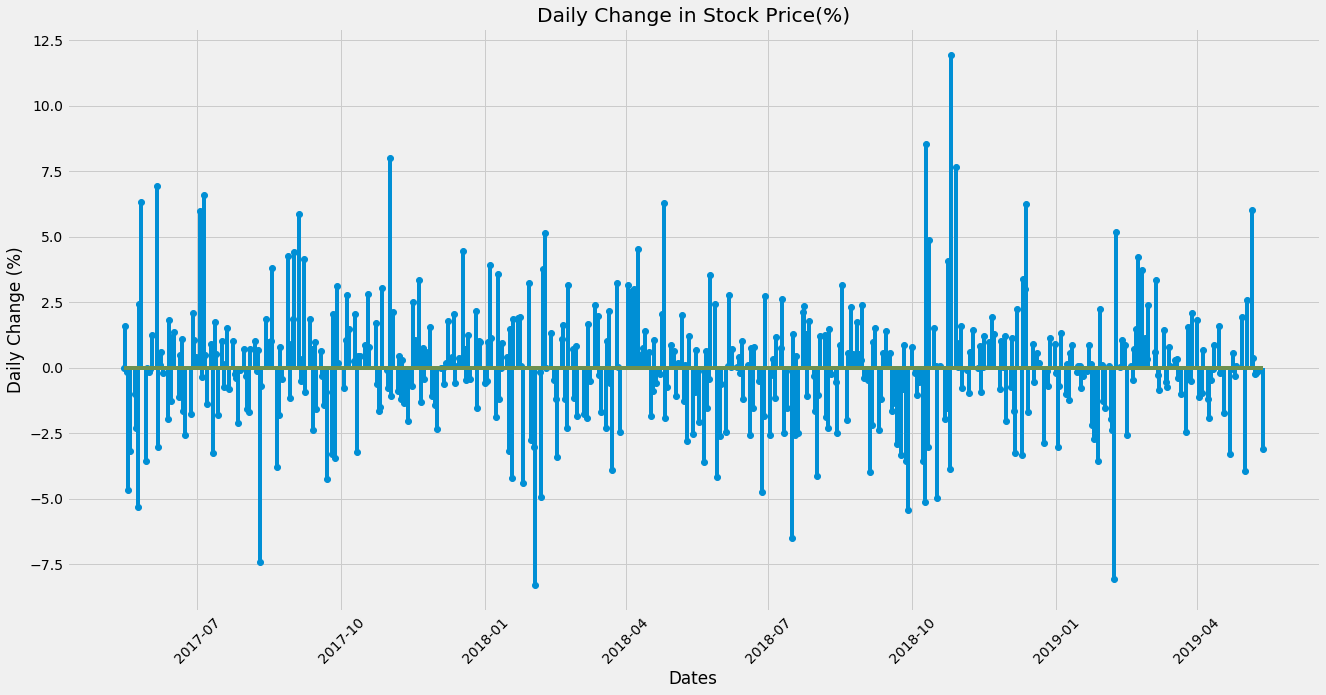

In [40]:
plt.figure(figsize=(20,10))
plt.stem(raymond.index,raymond['Day_Perc_Change'])
plt.title("Daily Change in Stock Price(%)")
plt.xlabel("Dates")
plt.ylabel("Daily Change (%)")
plt.xticks(rotation=45)
plt.show()

Checking Again Which has the min Day percentage change

In [43]:
raymond[raymond.Day_Perc_Change == min(raymond.Day_Perc_Change)]

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2018-02-02,RAYMOND,EQ,1017.7,1009.0,1009.0,921.0,927.0,933.3,960.21,1054416,1.012463e+09,28104,265833,25.21,2018,2,868.371027,-8.29321,Bear drop


- As you can see at 02 Feb 2018 closing price drop suddenly from 1017.7 to 933.3.
- 9% of daily change occur in one day.

# <a id=id3>PROBLEM STATEMENT 2.3 </a>
Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change.<br>
<img src="https://www.aspiration.link/machine-learning/internship/images/2.png" alt="Drawing" style="width: 400px;" align="left"/>
<img src="https://www.aspiration.link/machine-learning/internship/images/3.png" alt="Drawing" style="width: 400px;"/>

####  Plot the daily volumes

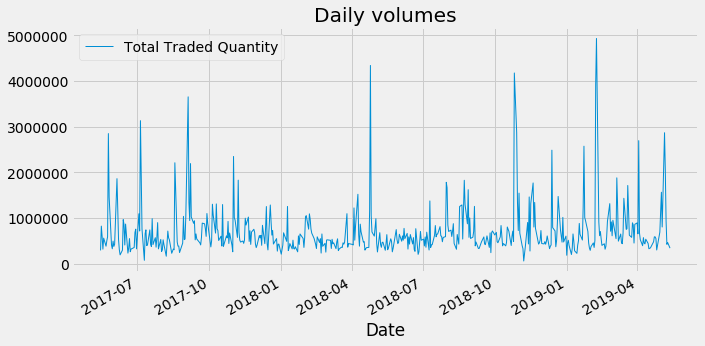

In [45]:
raymond.plot(y="Total Traded Quantity", title="Daily volumes", linewidth=1, figsize=(10,5))
plt.show()

#### Comparing Volume and Daily Percentage change

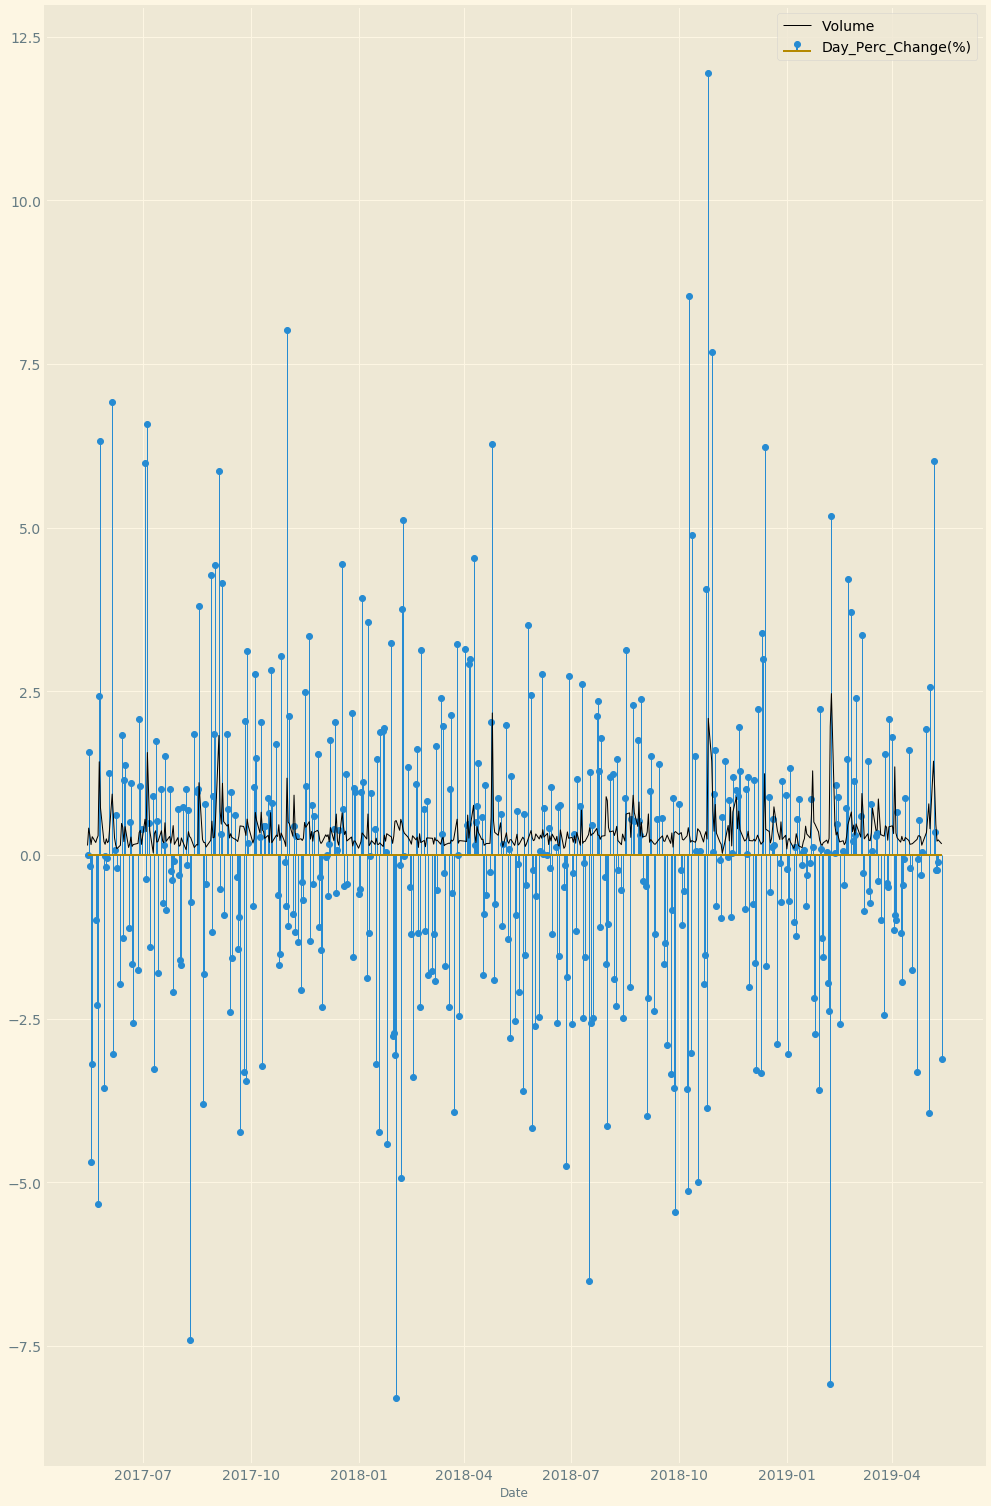

In [59]:
with plt.style.context(plt.style.available[23]):
    plt.figure(figsize=(15,25))
    markerline, stemlines, baseline = plt.stem(raymond.index, raymond.Day_Perc_Change,label="Day_Perc_Change(%)", use_line_collection=True)
    plt.setp(stemlines, 'linewidth', 1)
    plt.plot(raymond.index, raymond["Total Traded Quantity"].values/2000000, color='k', linewidth=1, label="Volume")
    plt.xlabel("Date")
    plt.legend()
    plt.show()

From above Plot,

1. **When `Volume` sunddenly increase, It means `Day_Perc_Change` either increased or decreased which affect Stock price directly.**<br><br>
E.g. When some news came up about company, it highly affect the stock price of the company
    - When there is **good news** about Company, People tend to buy the stock and **stock price start to increase**. Which means, at end of day **Volume is large**. It means Positive change happen in stock than previous day.
    - When there is **bad news** about Company, People tend to sell the stock and **stock price start to decrease**. Which means, at end of day **Volume is large**. It means negative change happen in stock than previous day.
<br><br>
2. **When `Day_Perc_Change` Varies sightly within range of 10%, Volume shows increment in proportion to it.**<br><br>
When closing price's percentage change in between -10% and 10% Volume increase. Means most of investors are likely to buy or sell the stock when it gives profit or loss of 10% only. Means Number of trade are large which means volume is large.
<br><br>
3. **When very large/drastic change happens in `Day_Perc_Change`, Sometimes Volume don't change that much.**<br><br>
When closing price's percentage change beyond range of -20% and 20% Volume don't react to it that much. Means most of investors don't sell the stock when it gives loss beyond 20%. Means Number of trade are decreases and volume is small. Obseve large spikes of Day_Perc_Change in above plot.


Trading volume in itself doesn't affect stock price directly, but it does have a huge impact on the way that shares move.

C:\Users\Shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


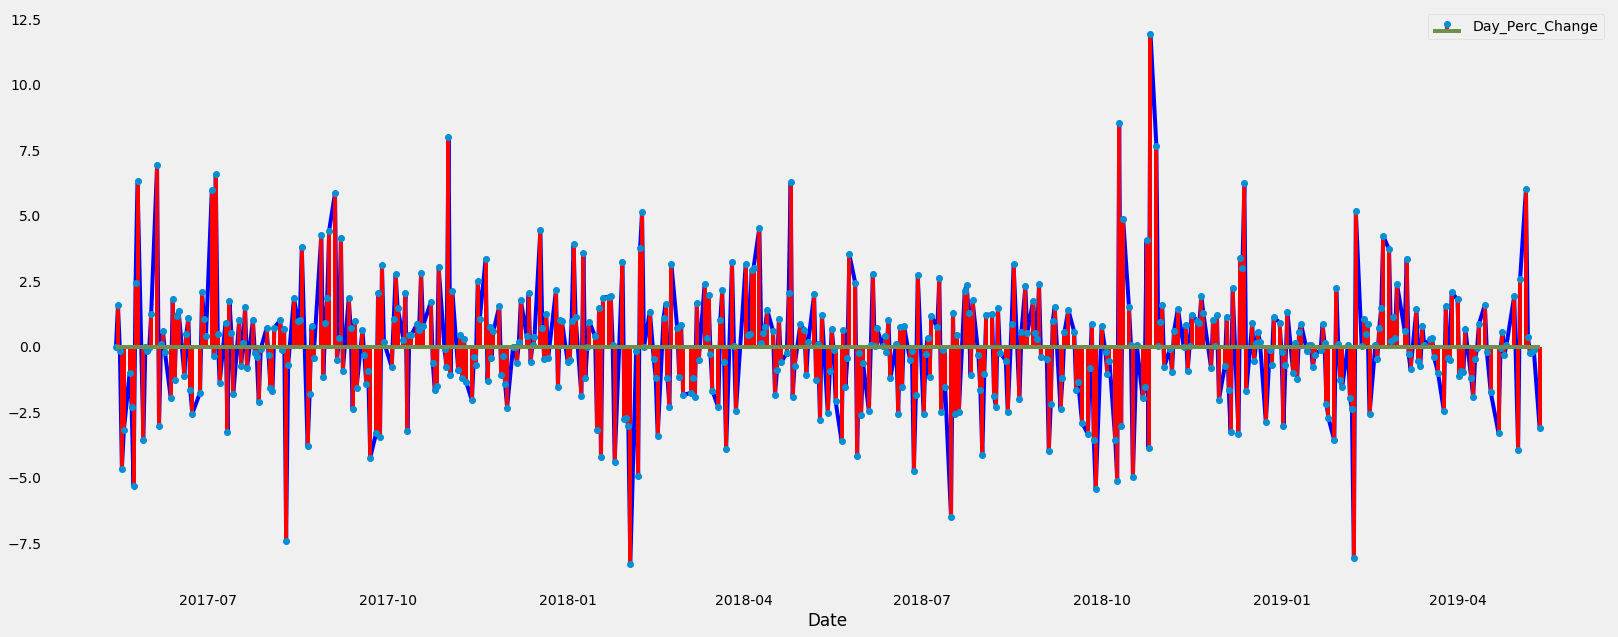

In [60]:
plt.figure(figsize=(25,10))
plt.plot(raymond.index, raymond['Day_Perc_Change'], color = 'b')
plt.stem(raymond.index, raymond['Day_Perc_Change'], 'r', label='Day_Perc_Change')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.show()

In [64]:
raymond['Day_Perc_Change'].describe()

count    494.000000
mean       0.027730
std        2.289617
min       -8.293210
25%       -1.190769
50%        0.036464
75%        1.067778
max       11.952127
Name: Day_Perc_Change, dtype: float64

C:\Users\Shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


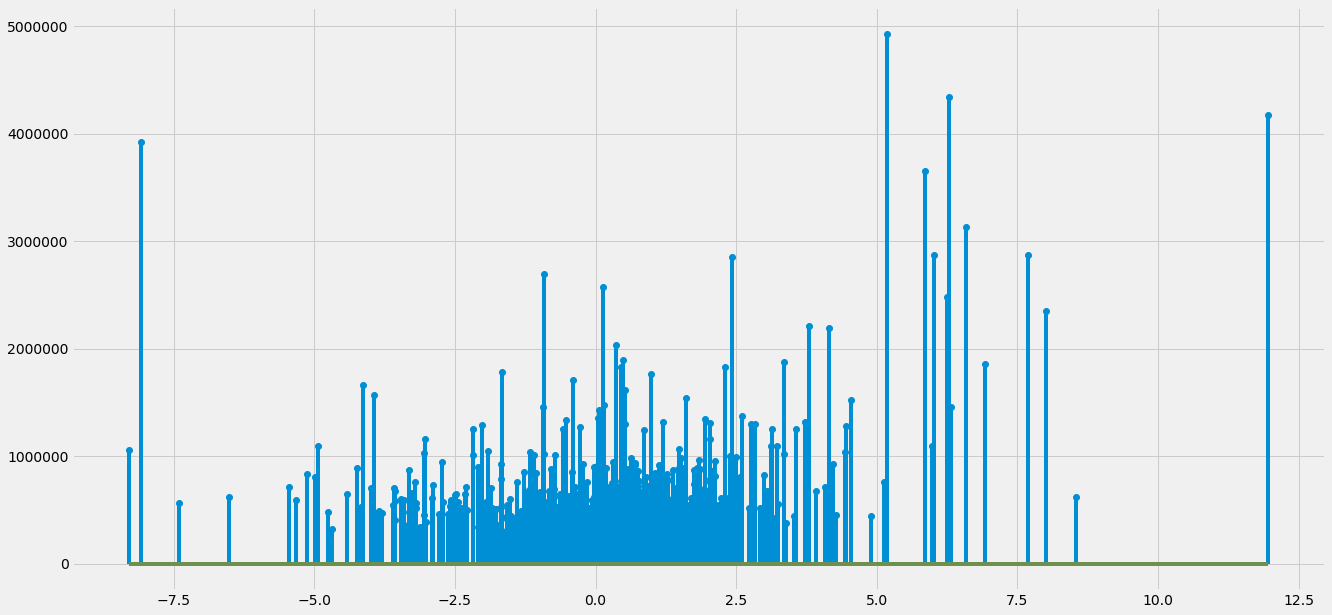

C:\Users\Shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


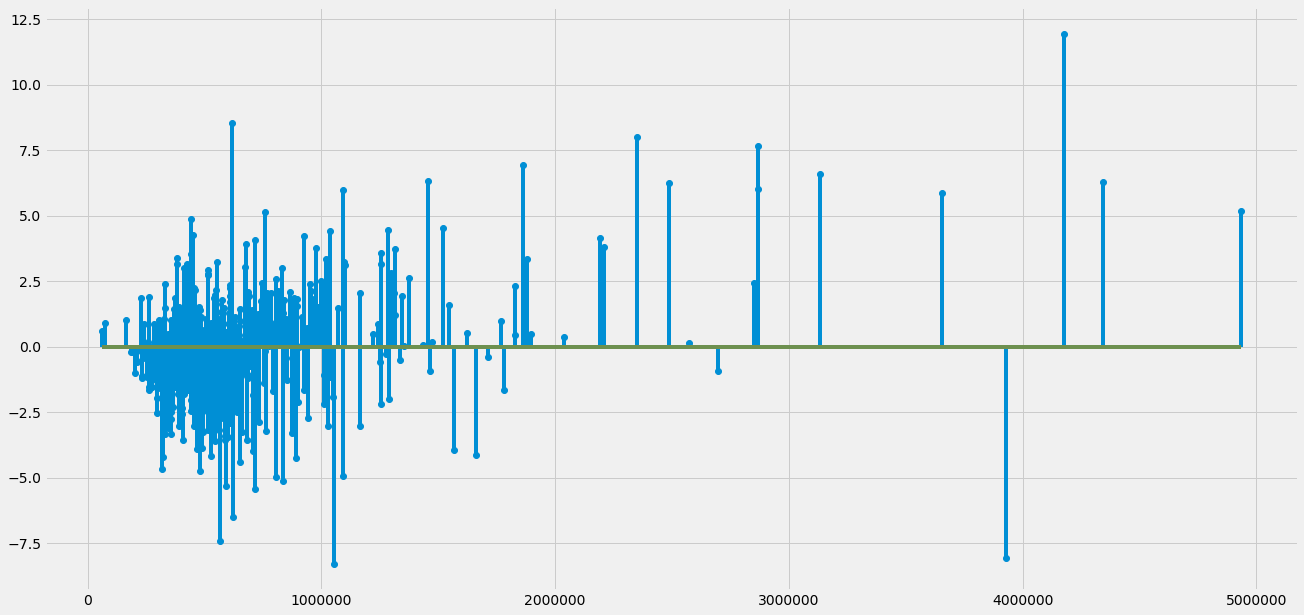

In [63]:
plt.figure(figsize=(20,10))
plt.stem(raymond['Day_Perc_Change'],raymond['Total Traded Quantity'])
plt.show()
plt.figure(figsize=(20,10))
plt.stem(raymond['Total Traded Quantity'],raymond['Day_Perc_Change'])
plt.show()

#### Analysis: 
The positive hills of Day_Perc_Change vs Date plot matches slightly with the Total Traded Quantity vs Date plot.<br>
#### Inference: 
It implies that whenever the positive daily percentages increases our total traded quantity also rises by somewhat the same amount.<br>
And since the daily changing percentage depends upon the closing prices of each day hence closing prices play a major in the increase of the total traded quantity

# <a id=id4>PROBLEM STATEMENT 2.4 </a>
We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type. 

<img src="https://www.aspiration.link/machine-learning/internship/images/4.png" alt="Drawing" style="width: 400px;" align="left"/>
<img src="https://www.aspiration.link/machine-learning/internship/images/5.png" alt="Drawing" style="width: 400px;"/>

In [65]:
raymond_trendwise = raymond.groupby('Trend')

####  Plot a pie chart for all the 'Trend'

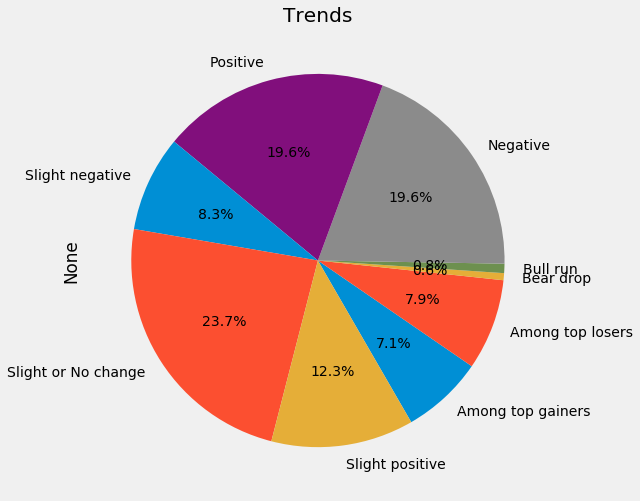

In [83]:
raymond_trendwise.size().plot.pie(figsize=(8,8),autopct='%1.1f%%', startangle=-60, radius=1)
plt.title('Trends')
plt.show()

In [73]:
mean_median = raymond_trendwise['Total Traded Quantity'].agg(['mean', 'median'])
mean_median

,mean,median
Trend,,
Among top gainers,1.463444e+06,1096681
Among top losers,6.611943e+05,589261
Bear drop,1.850032e+06,1054416
Bull run,2.503438e+06,2609890
Negative,5.345620e+05,481212
Positive,7.240896e+05,680800
Slight negative,6.256729e+05,494961
Slight or No change,5.919423e+05,464539
Slight positive,5.907689e+05,533556


#### BAR plot of average & median values of the 'Total Traded Quantity' by Trend type.

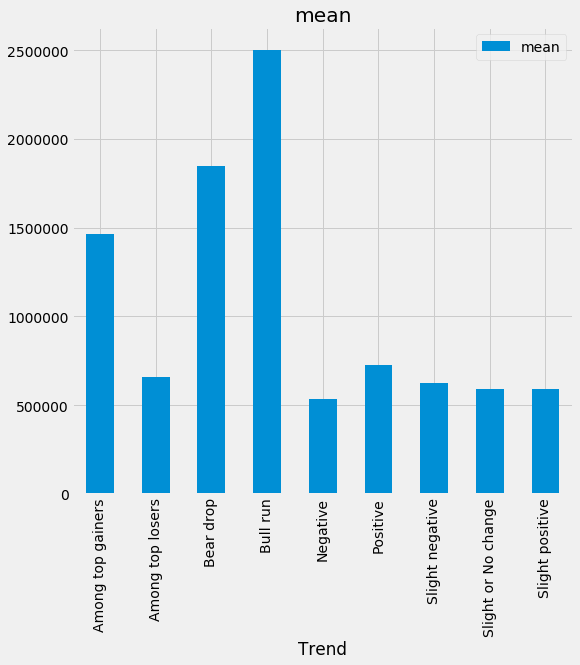

In [80]:
mean_median[['mean']].plot(kind='bar', subplots=True, figsize=(8,8))
plt.show()

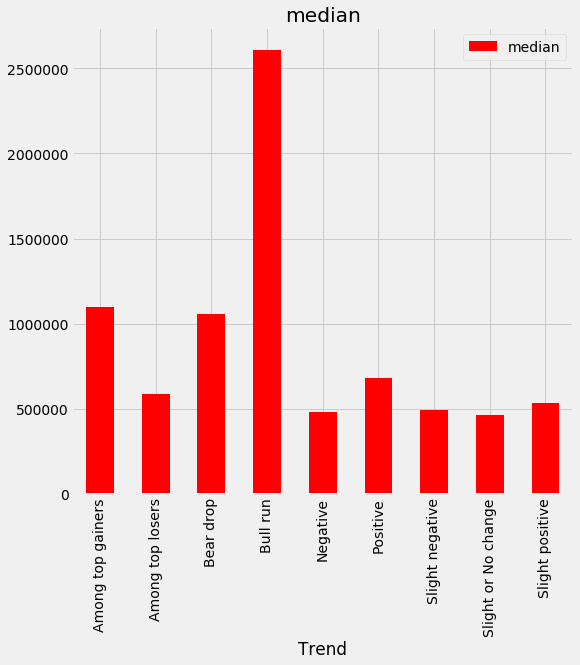

In [81]:
mean_median[['median']].plot(kind='bar', subplots=True, figsize=(8,8), color='r')
plt.show()

# <a id=id5>PROBLEM STATEMENT 2.5 </a>
Plot the daily return (percentage) distribution as a histogram.<br>
Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

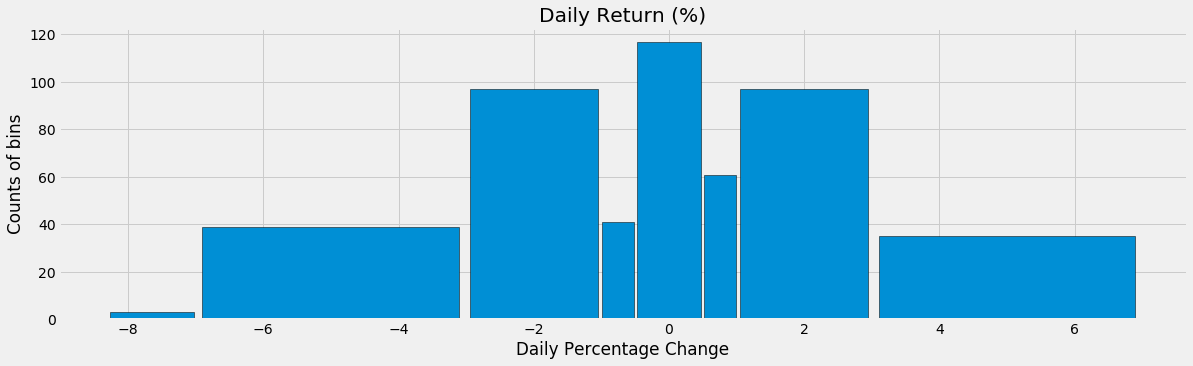

In [90]:
Category_bins = [raymond.Day_Perc_Change.min(), -7, -3, -1, -0.5, 0.5, 1, 3, 7]
raymond.Day_Perc_Change.hist(bins=Category_bins, edgecolor='black', log=False, figsize=(18,5), rwidth=0.95)
plt.title('Daily Return (%)')
plt.ylabel('Counts of bins')
plt.xlabel('Daily Percentage Change')
plt.show()

# <a id=id6>Query 2.6 </a>
We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price. 

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.
Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on [correlation](https://www.investopedia.com/terms/c/correlation.asp) and [diversification](https://www.investopedia.com/terms/d/diversification.asp). 

<img src="https://www.aspiration.link/machine-learning/internship/images/7.png" alt="Drawing" style="width: 500px;" align="left"/>

#### Load any 5 stocks of your choice into 5 dataframes.

In [91]:
lt_stock = pd.read_csv("./LT.csv")
pnb_stock = pd.read_csv("./PNB.csv")
suzlon_stock = pd.read_csv("./SUZLON.csv")
tatachem_stock = pd.read_csv("./TATACHEM.csv")
tatapower_stock = pd.read_csv("./TATAPOWER.csv")

#### Retain only rows for which ‘Series’ column has value ‘EQ’

And also reset the number of index

In [92]:
lt_stock = lt_stock[lt_stock.Series == 'EQ'].reset_index(drop=True)
pnb_stock = pnb_stock[pnb_stock.Series == 'EQ'].reset_index(drop=True)
suzlon_stock = suzlon_stock[suzlon_stock.Series == 'EQ'].reset_index(drop=True)
tatachem_stock = tatachem_stock[tatachem_stock.Series == 'EQ'].reset_index(drop=True)
tatapower_stock = tatapower_stock[tatapower_stock.Series == 'EQ'].reset_index(drop=True)

#### Create a single dataframe which contains the ‘Closing Price’ of each stock. Rename each column to the name of the stock that is contained in the column.

In [93]:
close_price_stock = pd.concat({
    lt_stock.Symbol[0]:lt_stock['Close Price'],
    pnb_stock.Symbol[0]:pnb_stock['Close Price'],
    suzlon_stock.Symbol[0]:suzlon_stock['Close Price'],
    tatachem_stock.Symbol[0]:tatachem_stock['Close Price'], 
    tatapower_stock.Symbol[0]:tatapower_stock['Close Price']
}, axis=1)

In [94]:
close_price_stock.tail()

,LT,PNB,SUZLON,TATACHEM,TATAPOWER
489,1366.60,83.95,6.35,596.00,64.35
490,1360.35,83.95,5.95,590.25,64.50
491,1356.45,84.25,5.65,589.00,64.40
492,1355.50,86.25,6.40,590.00,63.80
493,1317.65,79.80,5.60,574.90,62.60


####  Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.

In [95]:
pct_change_stock = close_price_stock.pct_change().dropna()
pct_change_stock.head()

,LT,PNB,SUZLON,TATACHEM,TATAPOWER
1,-0.000976,0.044065,0.005102,0.022388,0.003591
2,0.008474,-0.052254,0.010152,-0.009008,0.017889
3,-0.018713,-0.039685,0.005025,-0.020686,-0.018746
4,0.001132,-0.020820,0.030000,-0.013522,0.004776
5,0.015888,-0.027384,-0.009709,-0.028469,-0.024955


In [96]:
pct_change_stock.tail()

,LT,PNB,SUZLON,TATACHEM,TATAPOWER
489,0.010276,-0.026667,-0.037879,-0.015202,-0.022779
490,-0.004573,0.000000,-0.062992,-0.009648,0.002331
491,-0.002867,0.003574,-0.050420,-0.002118,-0.001550
492,-0.000700,0.023739,0.132743,0.001698,-0.009317
493,-0.027923,-0.074783,-0.125000,-0.025593,-0.018809


####  Using seaborn, analyse the correlation between the percentage changes in the five stocks. 

This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on correlation and diversification. 

In [97]:
import seaborn as sns

In [98]:
pct_change_stock.corr()

,LT,PNB,SUZLON,TATACHEM,TATAPOWER
LT,1.000000,0.237717,0.137295,0.184083,0.208746
PNB,0.237717,1.000000,0.278037,0.288115,0.276993
SUZLON,0.137295,0.278037,1.000000,0.233207,0.328770
TATACHEM,0.184083,0.288115,0.233207,1.000000,0.325402
TATAPOWER,0.208746,0.276993,0.328770,0.325402,1.000000


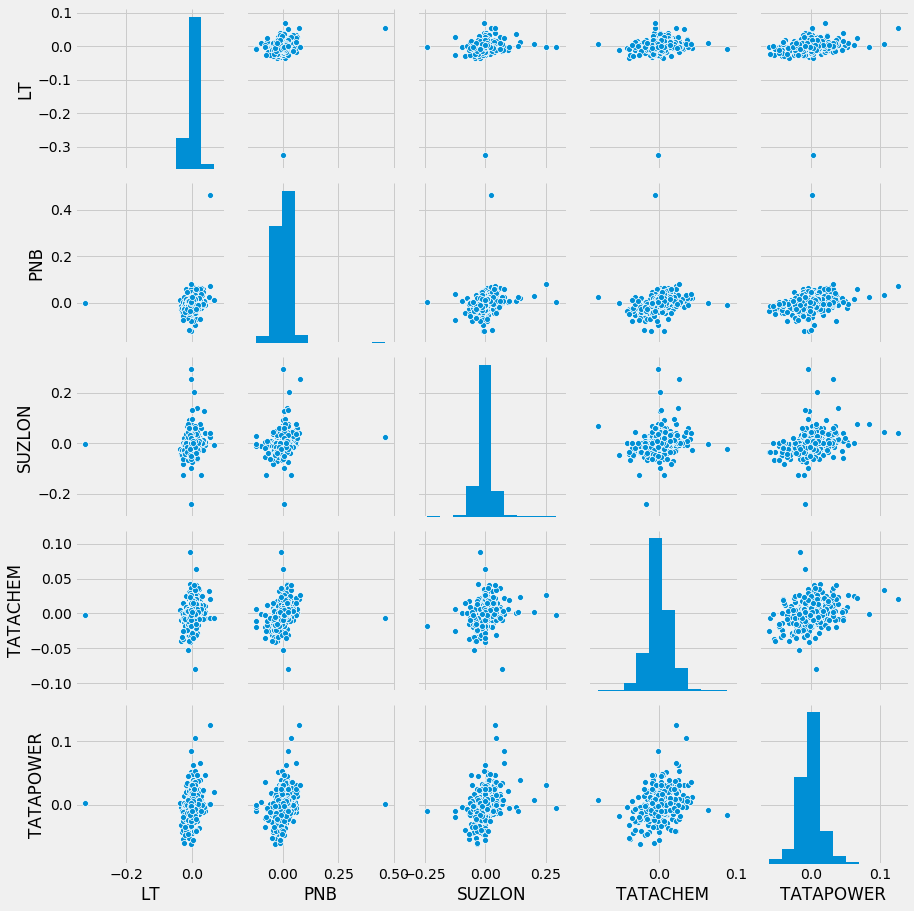

In [101]:
sns.pairplot(pct_change_stock)
plt.show()

One Common conclusion we can get from this,
- There is no positive correlation between any two companies, means stock of one company do not affect / don't have relationship with other company.
- Investor can freely invest in all company cause change in one stock not affect other.Even TATA Chemical and TATA Power don't have correlation.
- All histogram plots are look like marginal distribution while all scatter plot look like joint distribution between two different company.

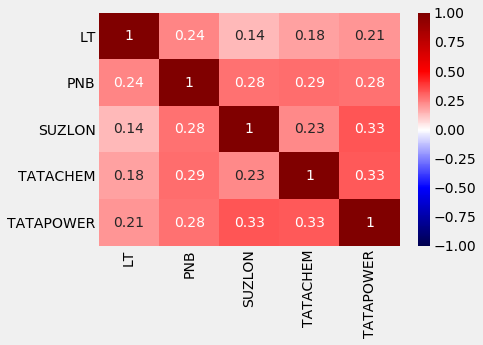

In [103]:
sns.heatmap(pct_change_stock.corr(),cmap='seismic',annot=True,vmin=-1,vmax=1)

# <a id=id7>PROBLEM STATEMENT 2.7 </a>
Volatility is the change in variance in the returns of a stock over a specific period of time.Do give the following documentation on [volatility](https://www.investopedia.com/terms/v/volatility.asp) a read.<br>
You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.<br>
Note: pandas provides a rolling() function for dataframes and a std() function also which you can use. 

In [166]:
rolling_lt = pct_change_stock.LT.rolling(7)

####  Calculate the 7 day rolling average of the percentage change of any of the stock prices.

In [167]:
# Rolling Average
rolling_avg_lt = rolling_lt.mean()

 Using shift function to shift "7 day average" from next day 
 cause it considering average price of current day as well which is not correct

In [168]:
rolling_avg_lt = rolling_avg_lt.shift()

# Drop NaNs from dataframe
rolling_avg_lt = rolling_avg_lt.dropna()
rolling_avg_lt.head(10)

8    -0.004704
9     0.002593
10    0.002897
11    0.005155
12    0.003803
13    0.000979
14    0.004497
15    0.008416
16    0.002932
17   -0.000937
Name: LT, dtype: float64

#### Then compute the standard deviation

In [169]:
std_dev_lt = rolling_lt.std().shift().dropna()
std_dev_lt.head(10)

8     0.016374
9     0.026540
10    0.026630
11    0.025120
12    0.025622
13    0.025153
14    0.025667
15    0.020722
16    0.010318
17    0.011917
Name: LT, dtype: float64

#### Plot the Values

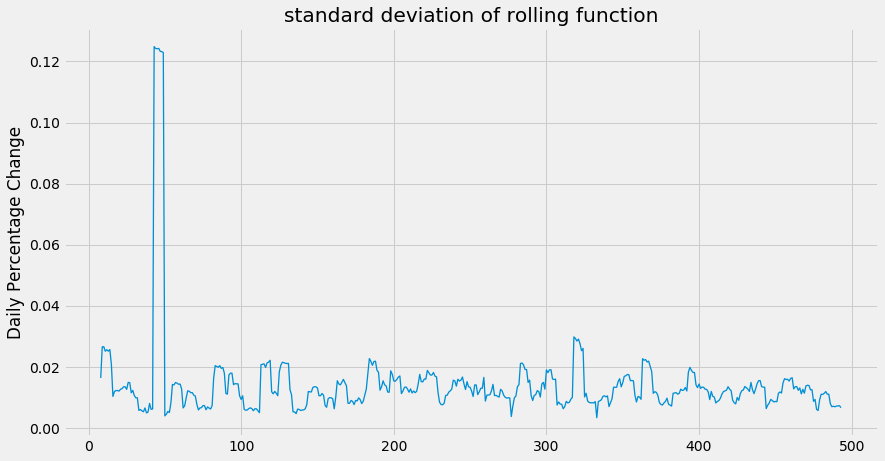

In [170]:
std_dev_lt.plot(figsize=(13,7), linewidth=1.3, title='standard deviation of rolling function')
plt.ylabel('Daily Percentage Change')
plt.show()

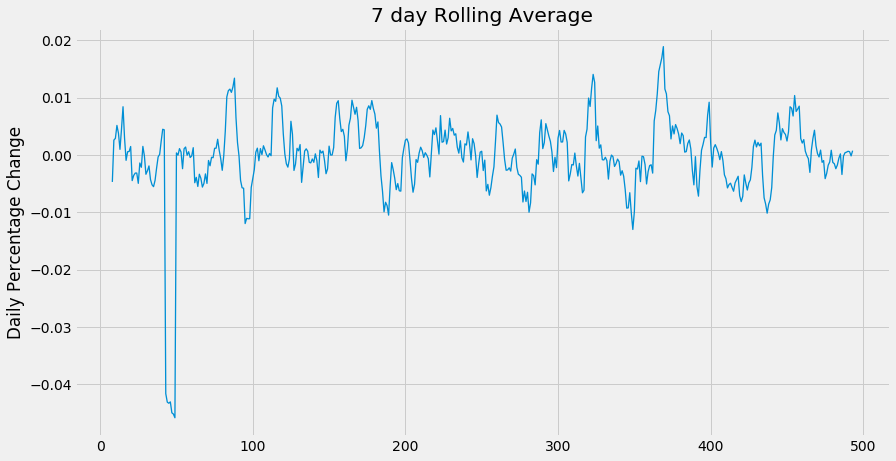

In [171]:
rolling_avg_lt.plot(figsize=(13,7), linewidth=1.3, title='7 day Rolling Average')
plt.ylabel('Daily Percentage Change')
plt.show()

# <a id=id8>PROBLEM STATEMENT 2.8 </a>
Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3) 

<img src="https://www.aspiration.link/machine-learning/internship/images/8.png" alt="Drawing" style="width: 500px;" align="left"/>

####  Calculate Volatility of NIfty

In [172]:
nifty50 = pd.read_csv('./Nifty50.csv')

In [173]:
nifty50.Date = pd.to_datetime(nifty50.Date)

In [174]:
nifty50.set_index('Date', inplace=True)

In [175]:
nifty50_pct_change = nifty50.Close.pct_change().dropna()

In [176]:
nifty50_volatility = nifty50_pct_change.rolling(7).std().shift().dropna()

In [177]:
nifty50_volatility.head()

Date
2017-05-25    0.005509
2017-05-26    0.008139
2017-05-29    0.008831
2017-05-30    0.007363
2017-05-31    0.007268
Name: Close, dtype: float64

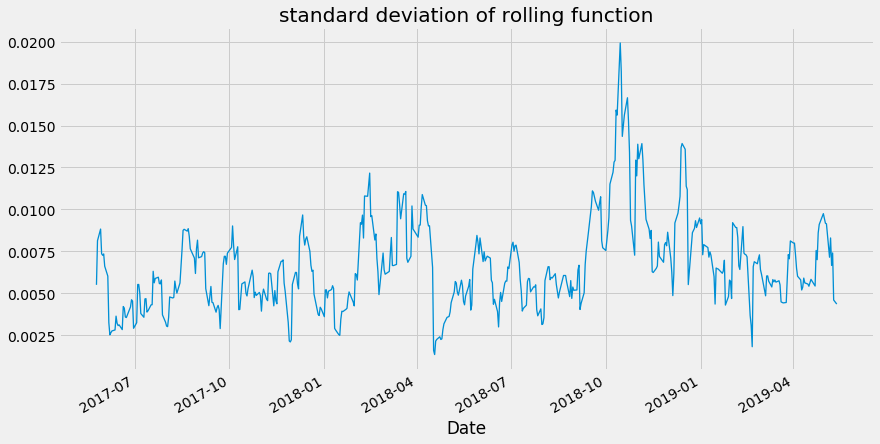

In [178]:
nifty50_volatility.plot(figsize=(13,7), linewidth=1.3, title='standard deviation of rolling function')
plt.show()

#### comparing the 2

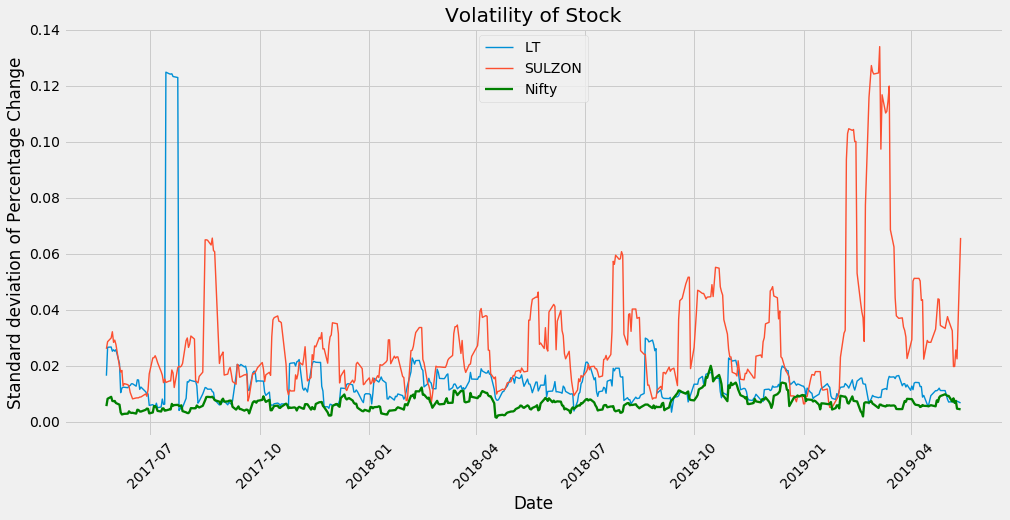

In [180]:
plt.figure(figsize=(15,7))
plt.plot(nifty50_volatility.index, std_dev_lt, label='LT', linewidth=1.4)
plt.plot(nifty50_volatility.index, pct_change_stock.SUZLON.rolling(7).std().shift().dropna(), label='SULZON', linewidth=1.4)
plt.plot(nifty50_volatility.index, nifty50_volatility, label='Nifty', color='g', linewidth=2.3)

plt.title('Volatility of Stock')
plt.xlabel('Date')
plt.ylabel('Standard deviation of Percentage Change')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## <a id=id9>PROBLEM STATEMENT 2.9 </a>
 Trade Calls - Using Simple Moving Averages. Study about moving averages [here](https://www.investopedia.com/terms/s/sma.asp). 
 
 <img src="https://www.aspiration.link/machine-learning/internship/images/9.png" alt="Drawing" style="width: 500px;" align="center"/>

Plot the 21 day and 34 day Moving average with the average price and decide a Call !
Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average.
One of the most widely used technical indicators.

### Moving average 
- **Support and resistance level indicator**
- It can help filter out the noise from random price movements and smooth it out in order to see the average value.

#### Moving Average used for
 - Identify Trends
 - Confirm reversals
 - Identify areas of support
 - Identify areas of resistance
 
<img src='https://i.ytimg.com/vi/1Z7TzEF-H_0/hqdefault.jpg' style="width: 500px;"/>

#### Disadvantage
- Based on past prices
- Lagging Indicator 
- It will not warn in advance (It will confirm when a trend change has taken place.)

#### How to use it for buy/sell ?
 
 - When price crosses up and over the moving average ==> It's signal to **Buy**.
 - When price crosses down and under the moving average ==> It's signal to **Sell**.
 
 <img src='https://i.ytimg.com/vi/FfHrlRQUOTs/maxresdefault.jpg' style="width: 500px;"/> 
 
 #### Type of Moving Average
 
 1. Simple Moving Average (SMA)
 2. Weighted Moving Average (WMA)
 3. Exponential Moving Average (EMA)
 
 #### Simple Moving Average (SMA)
 - For 10 days moving Average
     - add last 10 days of closing price and Divide by 10
     
     $p(E) = \prod_{j=0}^{10}\frac{Closing Price}{10}$
     
     
 - **LONGER SMA PERIOD --> MORE LAG, SLOWER TO REACT**
 - Downside 
     - SMA responds slower to rapid price changes because of equal weight to all periods
 - Counter Side
     - Use Weighted & Exponential Moving Average,
         - Which Repsond faster to price action 
         - More weight to recent periods
         - less weight to older periods
         - Reflect a quicker shift in sentiment
 #### Commonly used time period
     - 10-20 for short-term trends
     - 50 for mid-term trends
     - 200 for long-term trends

## EMA
- Short Time Frames<br>
- Fast Moving Market
## SMA
- When Holding a Position For a Longer Period Of Time<br>
- To Filter Out Noise

#### Generate moving averages

In [181]:
raymond['SMA_21'] = raymond['Average Price'].rolling(21).mean()
raymond['SMA_34'] = raymond['Average Price'].rolling(34).mean()

#### Save moving averages for the day before

In [182]:
prev_short_mavg = raymond['SMA_21'].shift(1)
prev_long_mavg = raymond['SMA_34'].shift(1)

#### Select buying and selling signals: where moving averages cross

In [183]:
buys = raymond.loc[(raymond['SMA_21'] <= raymond['SMA_34']) & (prev_short_mavg >= prev_long_mavg)]
sells = raymond.loc[(raymond['SMA_21'] >= raymond['SMA_34']) & (prev_short_mavg <= prev_long_mavg)]

#### Plotting Trade Calls 

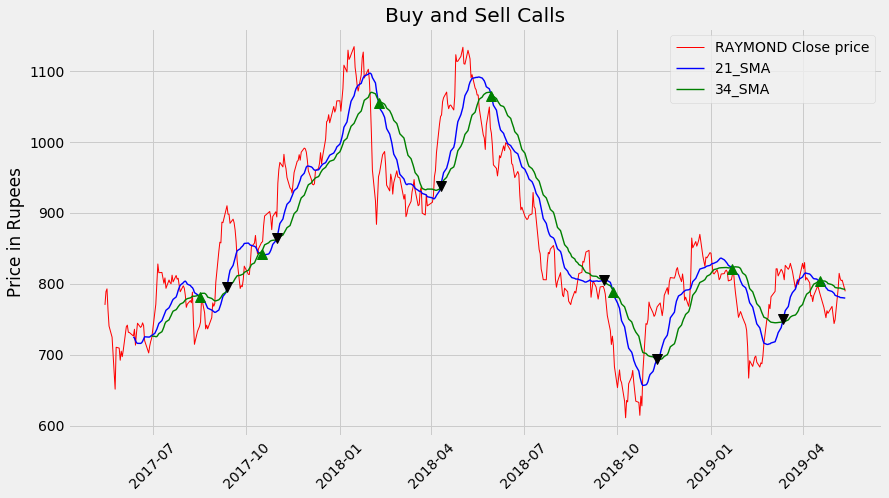

In [184]:
# The label parameter is useful for the legend
plt.figure(figsize=(13,7))
plt.plot(raymond.index, raymond['Average Price'], linewidth=1, label='RAYMOND Close price', color='r')
plt.plot(raymond.index, raymond['SMA_21'], linewidth=1.4, label='21_SMA', color='b')
plt.plot(raymond.index, raymond['SMA_34'], linewidth=1.4, label='34_SMA', color='g')

# Put each marker of buy and sell at the specific date
plt.plot(buys.index, raymond.loc[buys.index]['SMA_21'], '^', markersize=10, color='g')
plt.plot(sells.index, raymond.loc[sells.index]['SMA_21'], 'v', markersize=10, color='k')

# Doing the styling formatting
plt.ylabel("Price in Rupees")
plt.title("Buy and Sell Calls")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# <a id=id10>PROBLEM STATEMENT 2.10 </a>

Trade Calls - [Using Bollinger Bands](https://www.investopedia.com/terms/b/bollingerbands.asp)<br>
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average<br>
The bollinger bands comprise the following data points-
- The 14 day rolling mean of the closing price (we call it the average) 
- Upper band which is the rolling mean + 2 standard deviations away from the average. 
- Lower band which is the rolling mean - 2 standard deviations away from the average. 
- Average Daily stock price.

Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market.<br>
Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands.
Save to a new csv file. 
<img src="https://www.aspiration.link/machine-learning/internship/images/10.png" alt="Drawing" style="width: 500px;" align="left"/>

#### Calculate 14 day rolling mean and standard deviations

In [186]:
# Calculating 14 days moving average
raymond['SMA_14'] = raymond['Average Price'].rolling(14).mean()
# Calculating Standard deviation for 14 days
raymond['SD_14'] = raymond['Average Price'].rolling(14).std()

#### Calculating upper and lower bollinger bands

In [187]:
# Upper Bollinger Bands = Mean + 2*SD
raymond['upper_band'] = raymond.SMA_14 + 2*raymond.SD_14
# Lower Bollinger Bands = Mean - 2*SD
raymond['lower_band'] = raymond.SMA_14 - 2*raymond.SD_14

#### Plotting Bollinger Bands

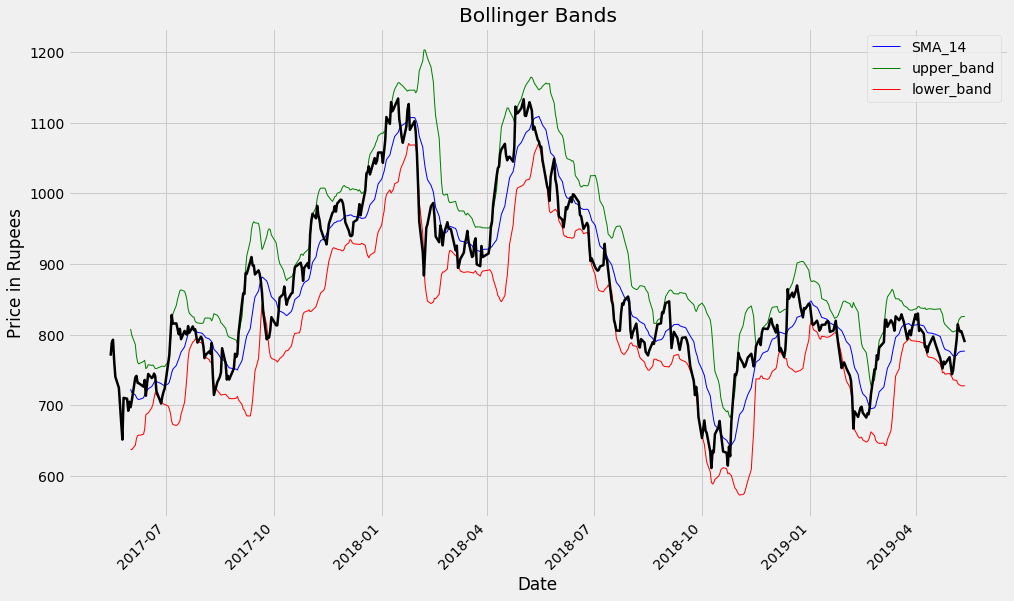

In [188]:
raymond[['SMA_14', 'upper_band', 'lower_band']].plot(figsize=(15,10), linewidth=1, color=['b', 'g', 'r'])
raymond['Average Price'].plot(figsize=(15,10), linewidth=2.5, color='k')
plt.title("Bollinger Bands")
plt.ylabel('Price in Rupees')
plt.xticks(rotation=45)
plt.show()

## Save the `stock_data` dataframe

In [190]:
# Save the dataframe as "week3.csv" file
raymond.to_csv('./week3.csv')